In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np



In [30]:
raw_path = "../data/raw/german_credit_modified.csv"
orig_path = "../data/original/german_credit_original.csv"
out_path = "../data/raw/german_credit_clean.csv"   # ruta estable

df = pd.read_csv(raw_path)
df_orig = pd.read_csv(orig_path)

In [31]:
df.duplicated().sum()

np.int64(0)

In [19]:
df_orig.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [50]:
df.describe() == df_orig.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
mean,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
std,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
min,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
25%,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
50%,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
75%,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
max,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Inicial: eliminar columnas extra y limpiar espacios en strings
import numpy as np

# Eliminar columnas extra que no estén en df_orig
extra_cols = [c for c in df.columns if c not in df_orig.columns]
if extra_cols:
    print("Columnas extra detectadas y eliminadas:", extra_cols)
    df = df.drop(columns=extra_cols)

# Limpiar strings: quitar espacios alrededor (no casteamos todavía)
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip()

# Reemplazar tokens comunes por NaN
missing_tokens = ["N/A","NA","NULL","null","?","unknown","error","invalid","INVALID","", "None"]
for tok in missing_tokens:
    df = df.replace(tok, np.nan)
    
# Convertir todas las columnas a numérico (coerce para convertir valores sucios a NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Columnas extra detectadas y eliminadas: ['mixed_type_col']


In [ ]:

# Convertir todas las columnas a numérico (coerce para convertir valores sucios a NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Si las formas coinciden, preferimos rellenar NaNs con los valores correspondientes de df_orig
same_shape = df.shape == df_orig.shape
if same_shape:
    for col in df.columns:
        # rellenar con df_orig donde df tenga NaN
        df[col] = df[col].fillna(df_orig[col])

# Si todavía hay NaNs, rellenar con 0 (supuesto: preferible a dejarlos como NaN para poder castear a int64)
if df.isna().any().any():
    na_counts = df.isna().sum()
    print("Hay NaNs residuales por columna (se rellenarán con 0):")
    print(na_counts[na_counts>0])
    #df = df.fillna(0)

# Finalmente casteamos todas las columnas a int64
try:
    df = df.astype('int64')
    print("Todas las columnas casteadas a int64.")
except Exception as e:
    print("Error convirtiendo a int64:", e)
    # Forzamos columna por columna para ofrecer más información si falla
    for col in df.columns:
        try:
            df[col] = df[col].astype('int64')
        except Exception as ecol:
            print(f"No se pudo castear la columna {col} a int64: {ecol}")


Hay NaNs residuales por columna (se rellenarán con 0):
laufkont    19
laufzeit    11
moral       18
verw        22
hoehe       12
sparkont    15
beszeit     19
rate        12
famges      11
buerge      16
wohnzeit    17
verm        15
alter       12
weitkred    14
wohn         9
bishkred    20
beruf       15
pers        10
telef       16
gastarb     18
kredit      20
dtype: int64
Todas las columnas casteadas a int64.
¿df igual a df_orig? False
No son iguales tras limpieza. Sobrescribiendo `df` con `df_orig` (además castearemos a int64).
df.shape = (1000, 21)
laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object


Columnas numéricas a analizar: ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']

Columna: laufkont
  Q1=1.0, Q3=4.0, IQR=3.0
  lower_bound=-3.5, upper_bound=8.5
  outliers abajo: 0, outliers arriba: 13


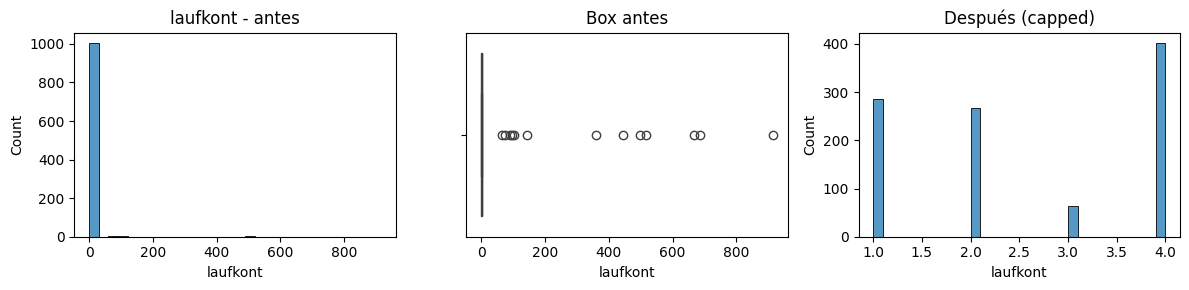


Columna: laufzeit
  Q1=12.0, Q3=24.0, IQR=12.0
  lower_bound=-6.0, upper_bound=42.0
  outliers abajo: 0, outliers arriba: 81


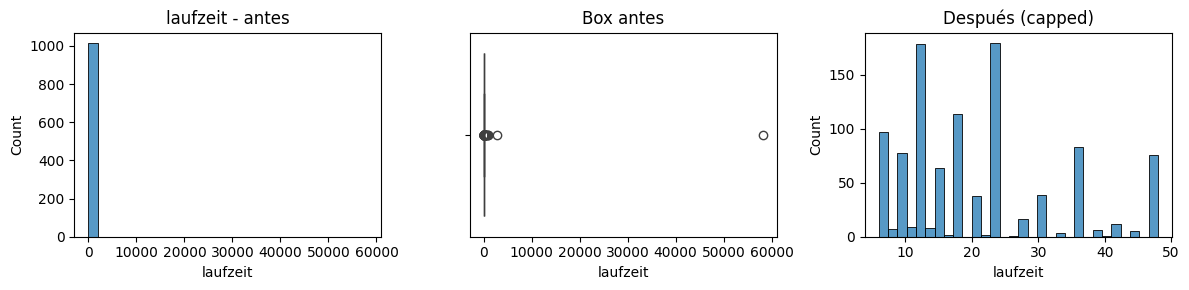


Columna: moral
  Q1=2.0, Q3=4.0, IQR=2.0
  lower_bound=-1.0, upper_bound=7.0
  outliers abajo: 0, outliers arriba: 18


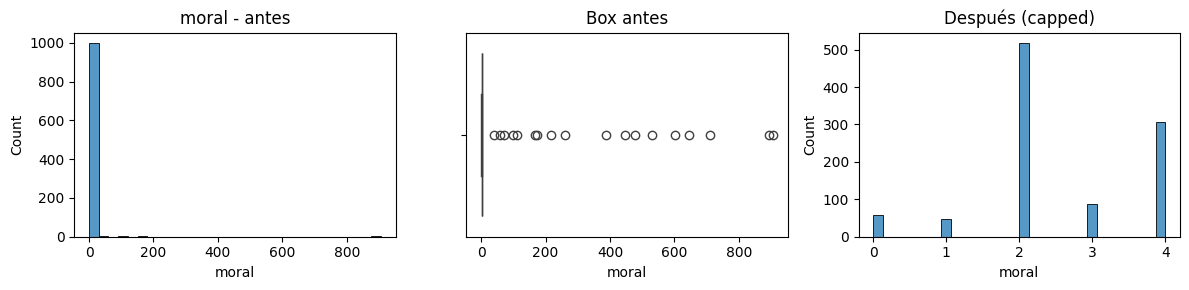


Columna: verw
  Q1=1.0, Q3=3.0, IQR=2.0
  lower_bound=-2.0, upper_bound=6.0
  outliers abajo: 0, outliers arriba: 126


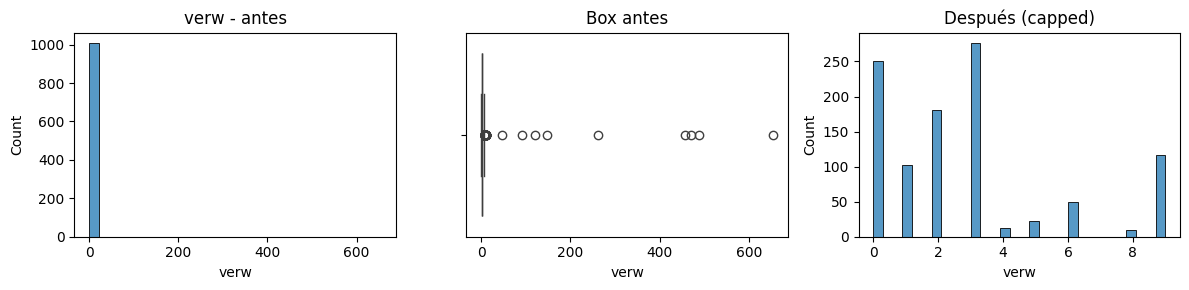


Columna: hoehe
  Q1=1354.25, Q3=3967.5, IQR=2613.25
  lower_bound=-2565.625, upper_bound=7887.375
  outliers abajo: 0, outliers arriba: 76


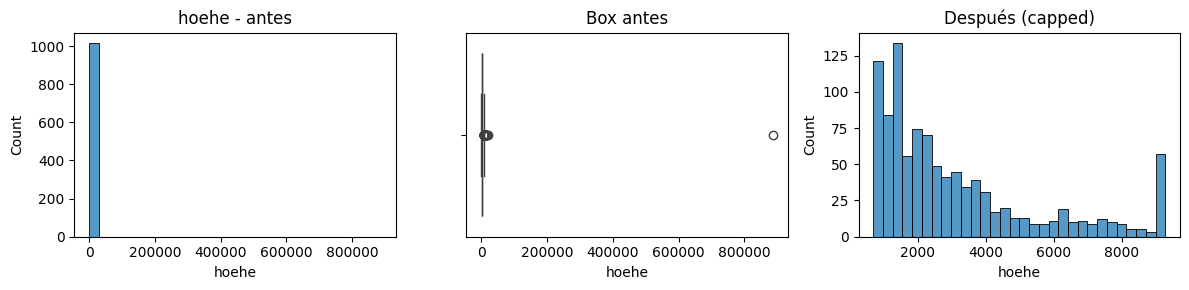


Columna: sparkont
  Q1=1.0, Q3=3.0, IQR=2.0
  lower_bound=-2.0, upper_bound=6.0
  outliers abajo: 0, outliers arriba: 9


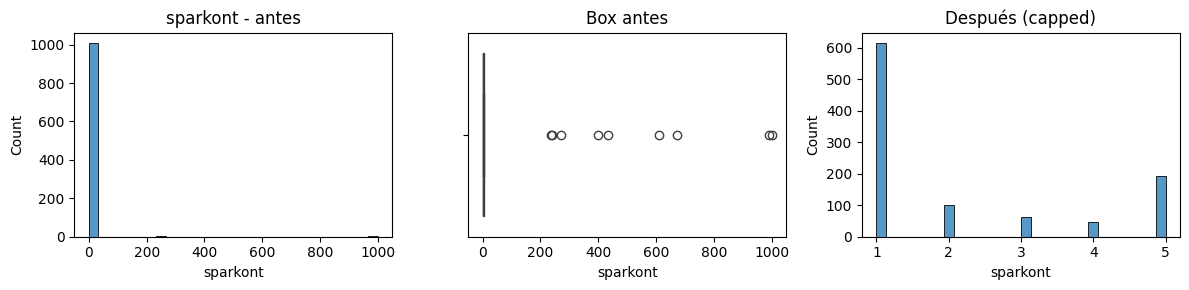


Columna: beszeit
  Q1=3.0, Q3=5.0, IQR=2.0
  lower_bound=0.0, upper_bound=8.0
  outliers abajo: 0, outliers arriba: 7


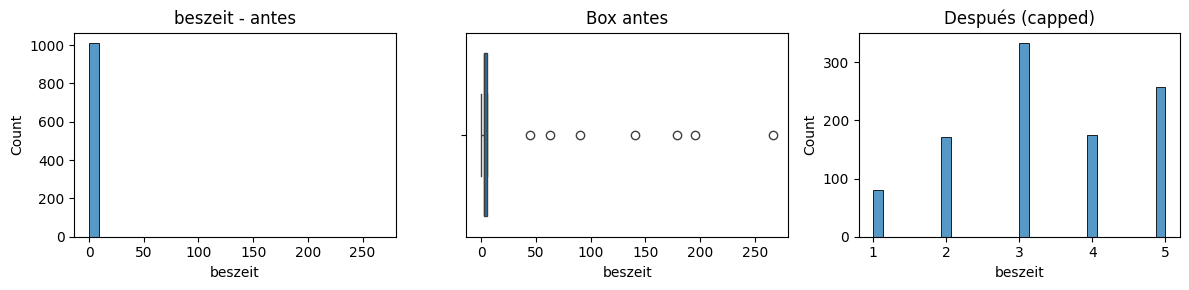


Columna: rate
  Q1=2.0, Q3=4.0, IQR=2.0
  lower_bound=-1.0, upper_bound=7.0
  outliers abajo: 0, outliers arriba: 4


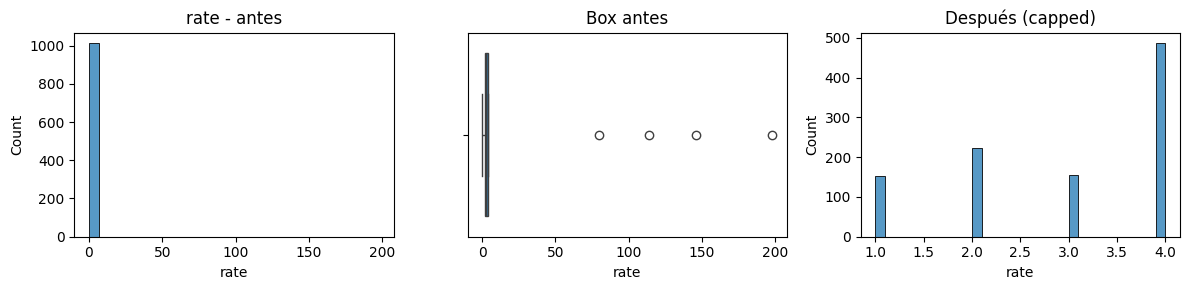


Columna: famges
  Q1=2.0, Q3=3.0, IQR=1.0
  lower_bound=0.5, upper_bound=4.5
  outliers abajo: 11, outliers arriba: 5


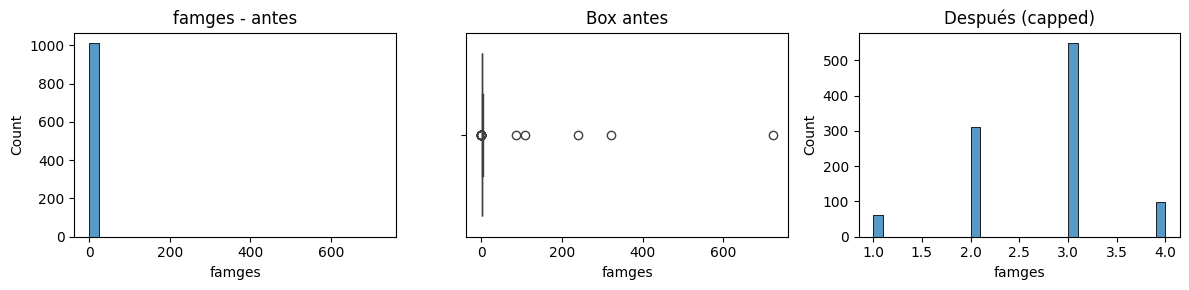


Columna: buerge
  Q1=1.0, Q3=1.0, IQR=0.0
  lower_bound=1.0, upper_bound=1.0
  outliers abajo: 16, outliers arriba: 103


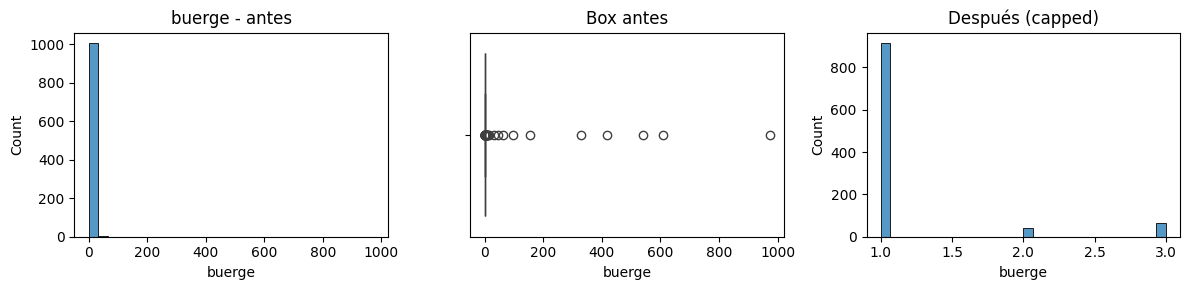


Columna: wohnzeit
  Q1=2.0, Q3=4.0, IQR=2.0
  lower_bound=-1.0, upper_bound=7.0
  outliers abajo: 0, outliers arriba: 10


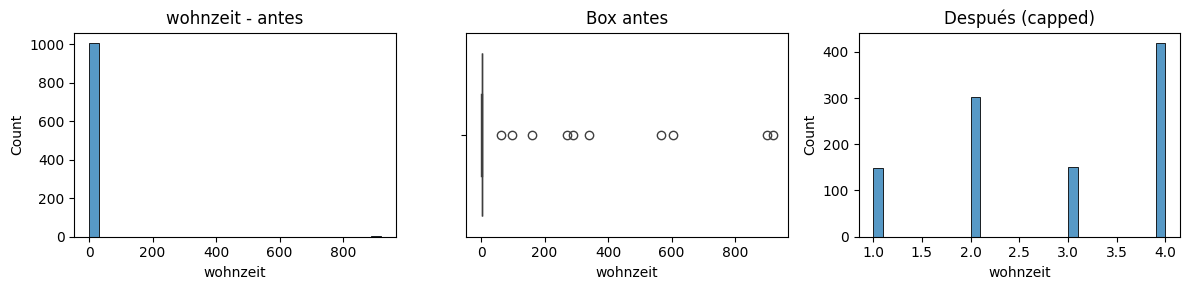


Columna: verm
  Q1=1.0, Q3=3.0, IQR=2.0
  lower_bound=-2.0, upper_bound=6.0
  outliers abajo: 0, outliers arriba: 8


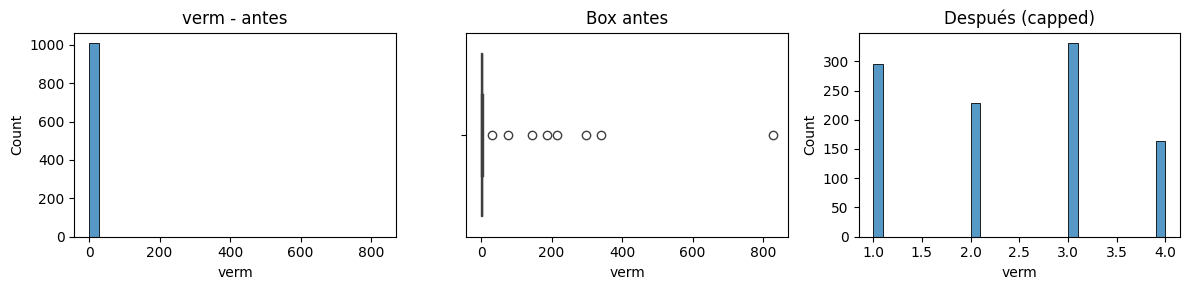


Columna: alter
  Q1=27.0, Q3=42.0, IQR=15.0
  lower_bound=4.5, upper_bound=64.5
  outliers abajo: 12, outliers arriba: 31


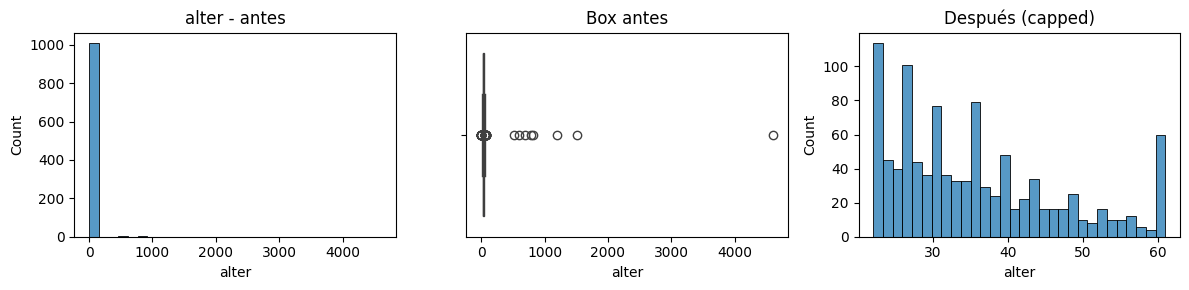


Columna: weitkred
  Q1=3.0, Q3=3.0, IQR=0.0
  lower_bound=3.0, upper_bound=3.0
  outliers abajo: 203, outliers arriba: 10


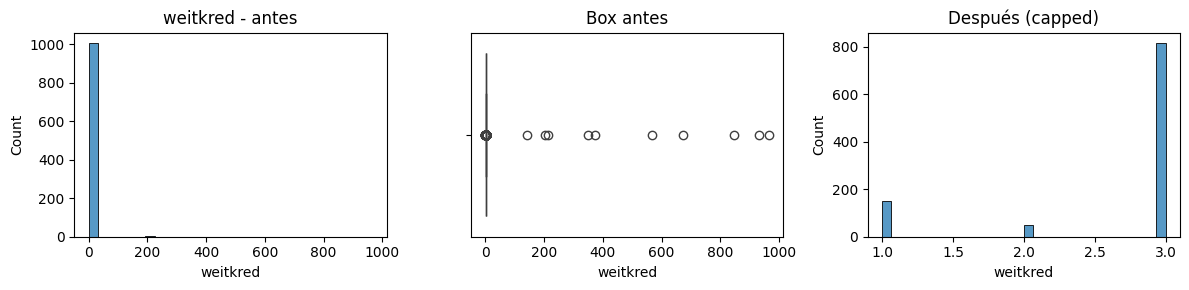


Columna: wohn
  Q1=2.0, Q3=2.0, IQR=0.0
  lower_bound=2.0, upper_bound=2.0
  outliers abajo: 186, outliers arriba: 119


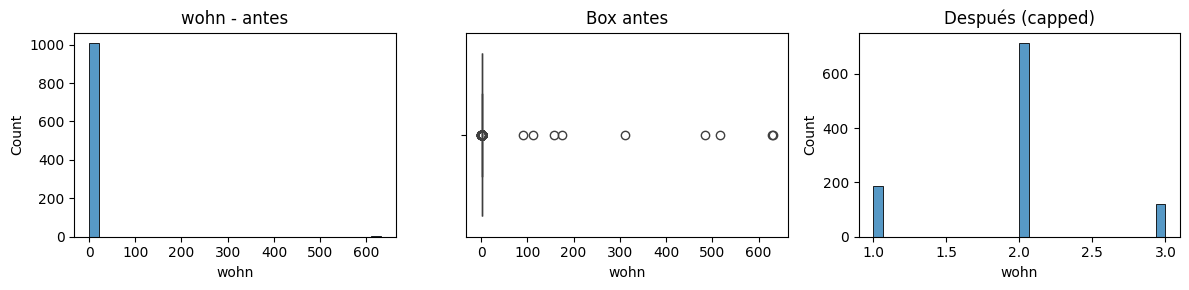


Columna: bishkred
  Q1=1.0, Q3=2.0, IQR=1.0
  lower_bound=-0.5, upper_bound=3.5
  outliers abajo: 0, outliers arriba: 19


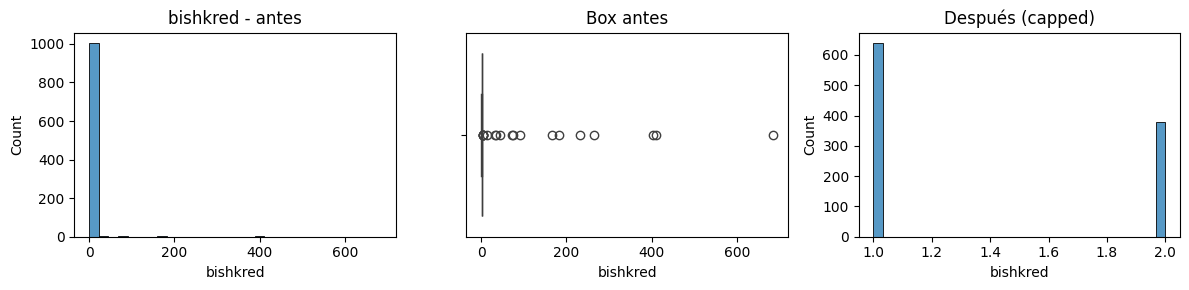


Columna: beruf
  Q1=3.0, Q3=3.0, IQR=0.0
  lower_bound=3.0, upper_bound=3.0
  outliers abajo: 232, outliers arriba: 167


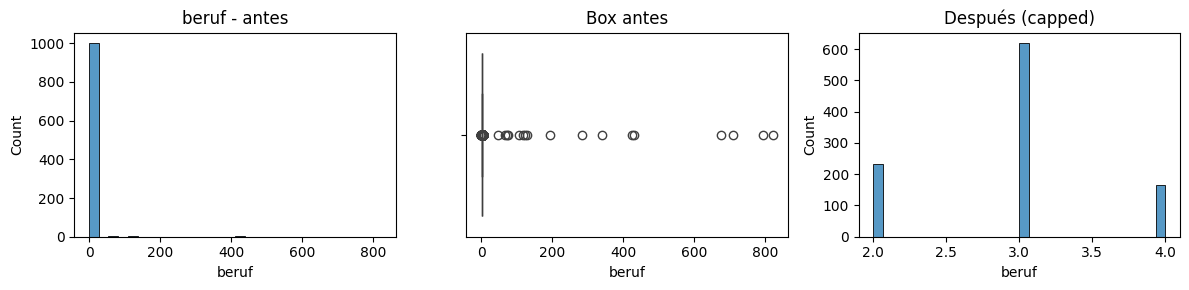


Columna: pers
  Q1=2.0, Q3=2.0, IQR=0.0
  lower_bound=2.0, upper_bound=2.0
  outliers abajo: 165, outliers arriba: 14


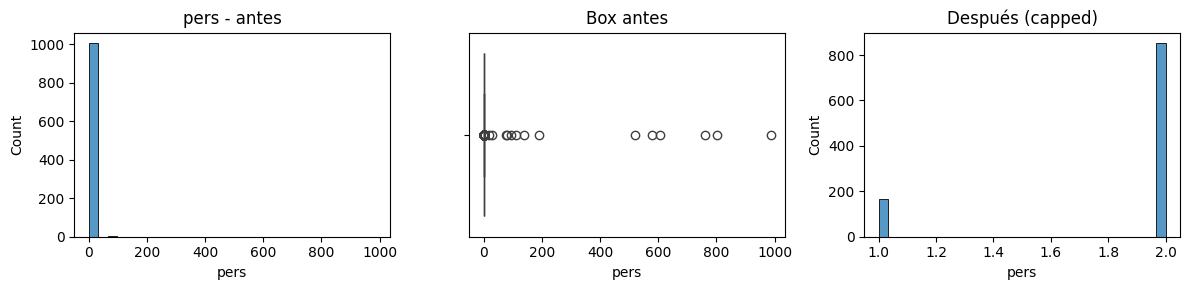


Columna: telef
  Q1=1.0, Q3=2.0, IQR=1.0
  lower_bound=-0.5, upper_bound=3.5
  outliers abajo: 0, outliers arriba: 5


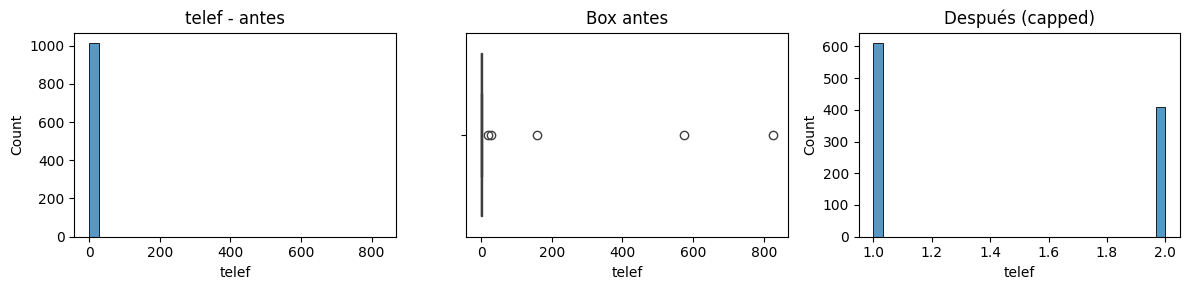


Columna: gastarb
  Q1=2.0, Q3=2.0, IQR=0.0
  lower_bound=2.0, upper_bound=2.0
  outliers abajo: 55, outliers arriba: 13


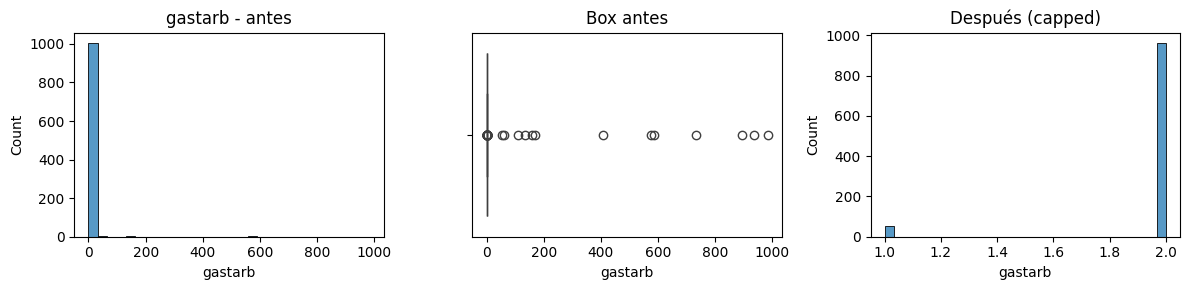


Columna: kredit
  Q1=0.0, Q3=1.0, IQR=1.0
  lower_bound=-1.5, upper_bound=2.5
  outliers abajo: 0, outliers arriba: 8


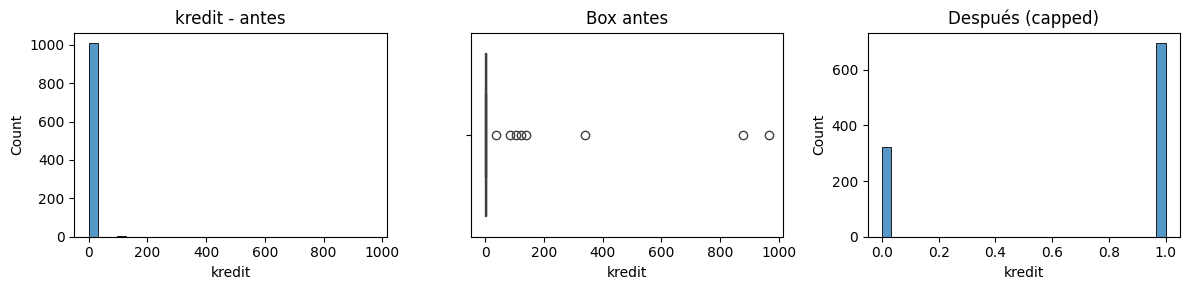

Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0 antes de castear a int64
Rellenando NaNs restantes con 0

In [178]:
# Análisis de distribuciones y limpieza de outliers (IQR) — reemplazar outliers por el máximo no-outlier
# Resultado: `df` quedará con outliers capados por el máximo no-outlier por columna y casteado a int64.
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Columnas numéricas a analizar:", num_cols)

summary = []
for col in num_cols:
    series = df[col].fillna(0).astype(float)
    if series.empty:
        print(f"Columna {col} vacía, se salta.")
        continue
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    lower_count = (series < lower).sum()
    upper_count = (series > upper).sum()
    # máximo y mínimo sin outliers
    non_outlier = series[(series >= lower) & (series <= upper)]
    #if not non_outlier.empty:
    #    non_outlier_max = non_outlier.max()
    #    non_outlier_min = non_outlier.min()
    #else:
        # fallback: usar percentiles extremos si todo es outlier
    non_outlier_max = series.quantile(0.95)
    non_outlier_min = series.quantile(0.05)

    summary.append({
        'col': col,
        'q1': q1, 'q3': q3, 'iqr': iqr,
        'lower': lower, 'upper': upper,
        'lower_count': int(lower_count), 'upper_count': int(upper_count),
        'non_outlier_min': non_outlier_min, 'non_outlier_max': non_outlier_max
    })

    print(f"\nColumna: {col}")
    print(f"  Q1={q1}, Q3={q3}, IQR={iqr}")
    print(f"  lower_bound={lower}, upper_bound={upper}")
    print(f"  outliers abajo: {lower_count}, outliers arriba: {upper_count}")

    # Mostrar gráficos antes y después (capped)
    capped = series.clip(lower=non_outlier_min, upper=non_outlier_max)
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    sns.histplot(series, bins=30, kde=False)
    plt.title(f"{col} - antes")
    plt.subplot(1,3,2)
    sns.boxplot(x=series)
    plt.title("Box antes")
    plt.subplot(1,3,3)
    sns.histplot(capped, bins=30, kde=False)
    plt.title("Después (capped)")
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

# Aplicar el reemplazo en df (crear copia y luego reasignar)
df_clean = df.copy()
for info in summary:
    col = info['col']
    lower = info['lower']
    upper = info['upper']
    lomax = info['non_outlier_max']
    lomin = info['non_outlier_min']
    q1 = info['q1']
    q3 = info['q3']

    # reemplazar valores por debajo y por encima
    mask_low = df_clean[col] < lower
    mask_high = df_clean[col] > lomax
    #if mask_low.any():
    #    df_clean.loc[mask_low, col] = lomin
    if mask_high.any():
        df_clean.loc[mask_high, col] = lomax

    # Asegurarnos de no tener NaNs antes del casteo; rellenar con q1
    if df_clean[col].isna().any().any():
        print("Rellenando NaNs restantes con 0 antes de castear a int64")
        df_clean[col] = df_clean[col].fillna(q3)

# Castear a int64
try:
    df_clean = df_clean.astype('int64')
    print("df_clean casteado a int64.")
except Exception as e:
    print("Error casteando a int64 (forzando columna por columna):", e)
    for c in df_clean.columns:
        try:
            df_clean[c] = df_clean[c].astype('int64')
        except Exception as e2:
            print(f"  No se pudo castear {c}: {e2}")



print("Limpieza de outliers completa. Resumen por columna:")
for info in summary:
    print(f"{info['col']}: outliers abajo={info['lower_count']} arriba={info['upper_count']}")


In [180]:
j = 0
for i in range(len(df_orig)):
    if not (df_clean.iloc[i,:] == df_orig.iloc[i,:]).all():
        j += 1 
        print(f"Diferencia en fila {i}")
        print("df_clean:", df_clean.iloc[i,:].to_dict())
        print("df_orig :", df_orig.iloc[i,:].to_dict())
    print(j)

0
0
0
0
0
0
0
Diferencia en fila 7
df_clean: {'laufkont': 1, 'laufzeit': 6, 'moral': 4, 'verw': 0, 'hoehe': 1361, 'sparkont': 1, 'beszeit': 2, 'rate': 2, 'famges': 3, 'buerge': 1, 'wohnzeit': 4, 'verm': 4, 'alter': 40, 'weitkred': 3, 'wohn': 2, 'bishkred': 2, 'beruf': 2, 'pers': 1, 'telef': 1, 'gastarb': 1, 'kredit': 1}
df_orig : {'laufkont': 1, 'laufzeit': 6, 'moral': 4, 'verw': 0, 'hoehe': 1361, 'sparkont': 1, 'beszeit': 2, 'rate': 2, 'famges': 3, 'buerge': 1, 'wohnzeit': 4, 'verm': 1, 'alter': 40, 'weitkred': 3, 'wohn': 2, 'bishkred': 1, 'beruf': 2, 'pers': 1, 'telef': 1, 'gastarb': 1, 'kredit': 1}
1
Diferencia en fila 8
df_clean: {'laufkont': 4, 'laufzeit': 18, 'moral': 4, 'verw': 3, 'hoehe': 1098, 'sparkont': 1, 'beszeit': 1, 'rate': 4, 'famges': 2, 'buerge': 1, 'wohnzeit': 4, 'verm': 3, 'alter': 61, 'weitkred': 3, 'wohn': 2, 'bishkred': 2, 'beruf': 1, 'pers': 2, 'telef': 1, 'gastarb': 2, 'kredit': 1}
df_orig : {'laufkont': 4, 'laufzeit': 18, 'moral': 4, 'verw': 3, 'hoehe': 1098, 